## Canada Public COVID-19 Data: First Exploration

J. Colliander  
2020-03-26

> The purpose of this notebook is to access the public COVID-19 data hosted on this [Google sheet](https://docs.google.com/spreadsheets/d/1D6okqtBS3S2NRC7GFVHzaZ67DuTw7LX49-fqSLwJyeo/edit#gid=942958991), put the data into a Pandas DataFrame, and generate a few initial visualizations.

In [27]:
import pandas as pd
import numpy as np
from datetime import *
from dateutil.relativedelta import *
import calendar
from dateutil.rrule import *
from dateutil.parser import *
import matplotlib.pyplot as plt 
import datetime

In [2]:
%matplotlib inline

In [95]:
# The top three rows of the Google sheet contain information about the data set. The `skiprows` call removes those.
# The `parse_dates` call transforms the date data into timestamps that can be manipulated in Python.
data = pd.read_csv('https://docs.google.com/spreadsheets/d/1D6okqtBS3S2NRC7GFVHzaZ67DuTw7LX49-fqSLwJyeo/export?format=csv&id', 
                 skiprows=3, parse_dates=['date_report', 'report_week'] )

In [94]:
data

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source
0,1,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25,2020-01-19,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,NaN,NaN
1,2,2,50-59,Female,Toronto,Ontario,Canada,2020-01-27,2020-01-26,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Travel and Close Contact,NaN
2,3,1,40-49,Male,Vancouver Coastal,BC,Canada,2020-01-28,2020-01-26,1,China,NaN,https://news.gov.bc.ca/releases/2020HLTH0015-0...,NaN,NaN
3,4,3,20-29,Female,Middlesex-London,Ontario,Canada,2020-01-31,2020-01-26,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,NaN,NaN
4,5,2,50-59,Female,Vancouver Coastal,BC,Canada,2020-04-02,2020-02-02,0,NaN,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-0...,The individual had close contact with family v...,NaN
5,6,3,30-39,Male,Vancouver Coastal,BC,Canada,2020-06-02,2020-02-02,1,China,NaN,https://news.gov.bc.ca/releases/2020HLTH0025-0...,NaN,NaN
6,7,4,30-39,Female,Vancouver Coastal,BC,Canada,2020-06-02,2020-02-02,1,China,NaN,https://news.gov.bc.ca/releases/2020HLTH0025-0...,NaN,NaN
7,8,5,30-39,Female,Interior,BC,Canada,2020-02-14,2020-09-02,1,China,NaN,(1) https://news.gov.bc.ca/releases/2020HLTH00...,NaN,NaN
8,9,6,30-39,Female,Fraser,BC,Canada,2020-02-20,2020-02-16,1,Iran,NaN,(1) https://news.gov.bc.ca/releases/2020HLTH00...,NaN,NaN
9,10,4,20-29,Female,Toronto,Ontario,Canada,2020-02-23,2020-02-23,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/02/...,NaN,NaN


In [12]:
data.columns

Index(['case_id', 'provincial_case_id', 'age', 'sex', 'health_region',
       'province', 'country', 'date_report', 'report_week', 'travel_yn',
       'travel_history_country', 'locally_acquired', 'case_source',
       'additional_info', 'additional_source'],
      dtype='object')

### Issues with the data

The 7th row has an entry under `report_week` of `2020-09-02` which should probably be `2020-02-09`. No cases have been observed in September in the future.

In [24]:
data['report_week'].max()

Timestamp('2020-09-02 00:00:00')

Similar problem in the `date_report` column:

In [25]:
data['date_report'].max()

Timestamp('2020-12-03 00:00:00')

The data should be corrected. I will proceed in a different way for now.

### Localize the time (omits extraneous cases with data entry errors)

In [29]:
## Localize the Analysis in Time
start_time= datetime.datetime(2020, 1, 1, 0, 0, 0, 1) 
end_time = datetime.datetime(2020, 4, 1, 0, 0, 0, 1) 
# end_time = datetime.datetime.now()

In [33]:
df = data.loc[(data['date_report'] > start_time ) 
             & (data['date_report'] < end_time )
             & (data['report_week'] > start_time ) 
             & (data['report_week'] < end_time )]

In [36]:
df['report_week'].max()

Timestamp('2020-03-22 00:00:00')

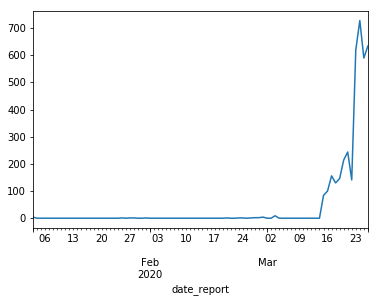

In [40]:
# Number of new cases in each week in Canada
df.groupby([pd.Grouper(key='date_report', freq='d')])['case_id'].count().plot()

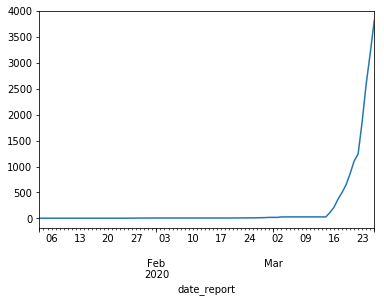

In [41]:
# Cumulative sum of cases in Canada
df.groupby([pd.Grouper(key='date_report', freq='d')])['case_id'].count().cumsum().plot()

In [92]:
# Cumulative sum of cases in Canada
df.groupby([pd.Grouper(key='date_report', freq='d')])['case_id'].count().cumsum()

date_report
2020-01-03       4
2020-01-04       4
2020-01-05       4
2020-01-06       4
2020-01-07       4
2020-01-08       4
2020-01-09       4
2020-01-10       4
2020-01-11       4
2020-01-12       4
2020-01-13       4
2020-01-14       4
2020-01-15       4
2020-01-16       4
2020-01-17       4
2020-01-18       4
2020-01-19       4
2020-01-20       4
2020-01-21       4
2020-01-22       4
2020-01-23       4
2020-01-24       4
2020-01-25       5
2020-01-26       5
2020-01-27       6
2020-01-28       7
2020-01-29       7
2020-01-30       7
2020-01-31       8
2020-02-01       8
              ... 
2020-02-26      12
2020-02-27      14
2020-02-28      16
2020-02-29      20
2020-03-01      20
2020-03-02      20
2020-03-03      29
2020-03-04      29
2020-03-05      29
2020-03-06      29
2020-03-07      29
2020-03-08      29
2020-03-09      29
2020-03-10      29
2020-03-11      29
2020-03-12      29
2020-03-13      29
2020-03-14      29
2020-03-15     113
2020-03-16     213
2020-03-17     369


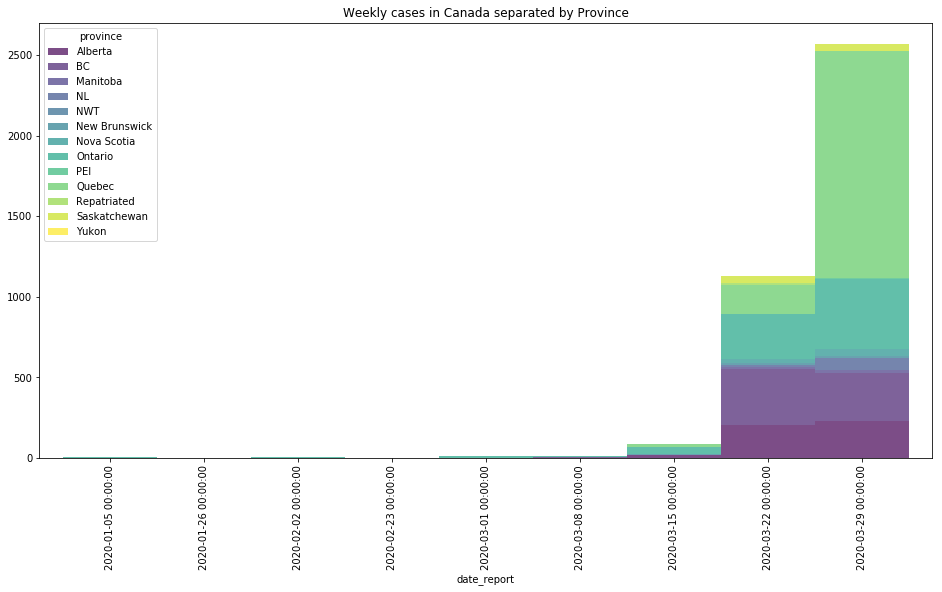

In [68]:
df.groupby([pd.Grouper(key='date_report', freq='W'),'province'])['case_id'].count().unstack().plot(
    kind="bar", stacked=True, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1, 
    title="Weekly cases in Canada separated by Province")

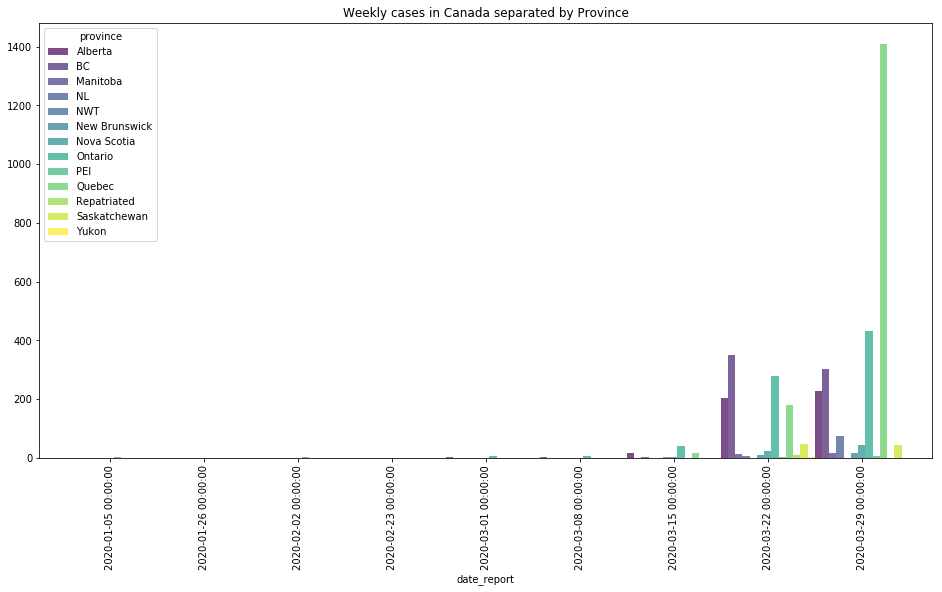

In [83]:
df.groupby([pd.Grouper(key='date_report', freq='W'),'province'])['case_id'].count().unstack().plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1, 
    title="Weekly cases in Canada separated by Province")

Wow! Big recent jump in Quebec.

## Localize within each province

In [69]:
df['province'].unique()

array(['Ontario', 'BC', 'Quebec', 'Manitoba', 'Nova Scotia',
       'New Brunswick', 'Alberta', 'Saskatchewan', 'Repatriated', 'NL',
       'PEI', 'NWT', 'Yukon'], dtype=object)

In [88]:
PROVINCE = 'Ontario'

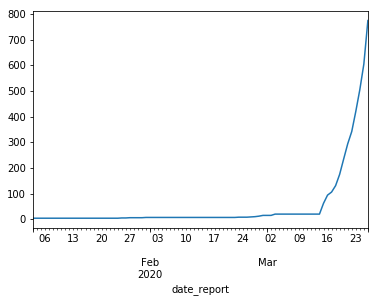

In [89]:
df.loc[df['province'] == PROVINCE].groupby(
    [pd.Grouper(key='date_report', freq='d')])['case_id'].count().cumsum().plot()

In [75]:
provinces = ['Ontario', 'BC', 'Quebec', 'Manitoba', 'Nova Scotia',
       'New Brunswick', 'Alberta', 'Saskatchewan', 'Repatriated', 'NL',
       'PEI', 'NWT', 'Yukon']

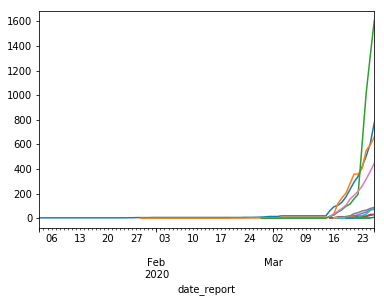

In [90]:
for PROVINCE in provinces:
    df.loc[df['province'] == PROVINCE].groupby(
    [pd.Grouper(key='date_report', freq='d')])['case_id'].count().cumsum().plot()